## ToMe Visualization - EPIC

In [29]:
import timm
import tome
import torchshow as ts
import pandas as pd
import numpy as np
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image

In [30]:
# We use the timm augreg models here, but you can use any supported implementation.
model_name = "mvitv2_base"
model = timm.create_model(model_name, pretrained=True)

# Source tracing is necessary for visualization!
tome.patch.timm(model, trace_source=True)

INFO:timm.models._builder:Loading pretrained weights from url (https://dl.fbaipublicfiles.com/mvit/mvitv2_models/MViTv2_B_in1k.pyth)


In [31]:
input_size = model.default_cfg["input_size"][1]

# Make sure the transform is correct for your model!
transform_list = [
    transforms.Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
]

# The visualization and model need different transforms
transform_vis  = transforms.Compose(transform_list)
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize(model.default_cfg["mean"], model.default_cfg["std"]),
])

In [32]:
df = pd.read_csv('P01_01_annotations.csv')
n = len(df)
segment_count = 4
rng = np.random.default_rng()
clip_id = rng.choice(n)
annotation = df.iloc[clip_id]
participant_id, video_id, start_frame, stop_frame = annotation['participant_id'], annotation['video_id'], annotation['start_frame'], annotation['stop_frame']
zero = '0'
segments = np.array_split(np.arange(start_frame, stop_frame + 1), segment_count)
frames = []
for i in range(segment_count):
    snippet = str(np.random.default_rng().choice(segments[i]))
    file_name = f'{(10 - len(snippet)) * zero}{snippet}'
    frame = Image.open(f'../../../EPIC-KITCHENS/{participant_id}/rgb_frames/{video_id}/frame_{file_name}.jpg')
    frames.append(frame)

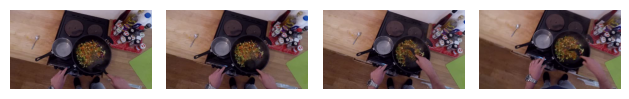

In [33]:
ts.show(frames)

In [34]:
model(transform_norm(frame).unsqueeze(0))

AttributeError: 'ToMeVisionTransformer' object has no attribute 'blocks'

## Visualize one image
You can play with the `r` value to get different numbers of tokens at the end of the network.

In [ ]:
merged = []

r = 16

for frame in frames:
    img_vis = transform_vis(frame)
    img_norm = transform_norm(frame)
    model.r = r
    _ = model(img_norm[None, ...])
    source = model._tome_info["source"]

    print(f"{source.shape[1]} tokens at the end")
    merged.append(tome.make_visualization(img_vis, source, patch_size=16, class_token=True))

11 tokens at the end
11 tokens at the end


/home/viki/sam/GitHub/ToMe/tome/vis.py:66: RuntimeWarning: invalid value encountered in divide
  color = (mask * img).sum(axis=(0, 1)) / mask.sum()


11 tokens at the end
11 tokens at the end


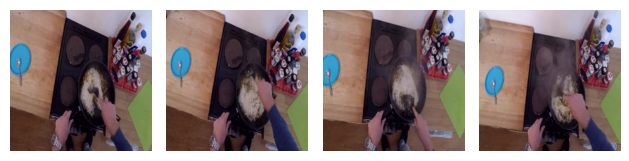

In [ ]:
ts.show(list(map(lambda x : transform_vis(x), frames)))

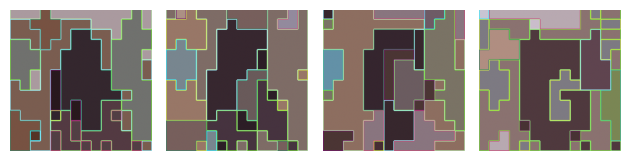

In [ ]:
ts.show(merged)